<a href="https://colab.research.google.com/github/Megi-analitika/datascientist.github.io/blob/main/%D0%94%D0%97%22%D0%9F%D1%80%D0%BE%D0%B4%D0%B2%D0%B8%D0%BD%D1%83%D1%82%D0%B0%D1%8F_%D0%BE%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

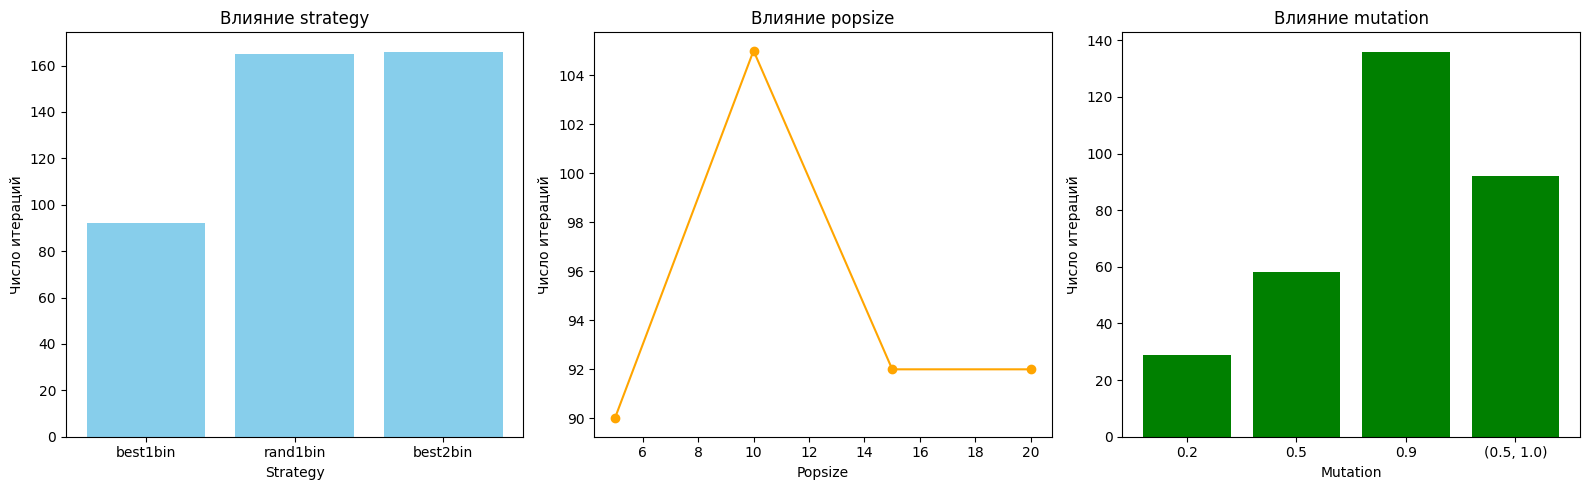

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

# Функция Ackley
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
seed = 42

# Параметры для тестирования
strategies = ['best1bin', 'rand1bin', 'best2bin']
popsizes = [5, 10, 15, 20]
mutations = [0.2, 0.5, 0.9, (0.5, 1.0)]

# Словари для хранения результатов
results_strategies = {}
results_popsizes = {}
results_mutations = {}

# Изучаем влияние strategy
for strategy in strategies:
    result = differential_evolution(ackley, bounds, strategy=strategy, seed=seed)
    results_strategies[strategy] = result.nit

# Изучаем влияние popsize
for popsize in popsizes:
    result = differential_evolution(ackley, bounds, popsize=popsize, seed=seed)
    results_popsizes[popsize] = result.nit

# Изучаем влияние mutation
for mutation in mutations:
    result = differential_evolution(ackley, bounds, mutation=mutation, seed=seed)
    results_mutations[str(mutation)] = result.nit

# Визуализация
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.bar(results_strategies.keys(), results_strategies.values(), color='skyblue')
plt.title('Влияние strategy')
plt.ylabel('Число итераций')
plt.xlabel('Strategy')

plt.subplot(1, 3, 2)
plt.plot(results_popsizes.keys(), results_popsizes.values(), marker='o', color='orange')
plt.title('Влияние popsize')
plt.ylabel('Число итераций')
plt.xlabel('Popsize')

plt.subplot(1, 3, 3)
plt.bar(results_mutations.keys(), results_mutations.values(), color='green')
plt.title('Влияние mutation')
plt.ylabel('Число итераций')
plt.xlabel('Mutation')

plt.tight_layout()
plt.show()


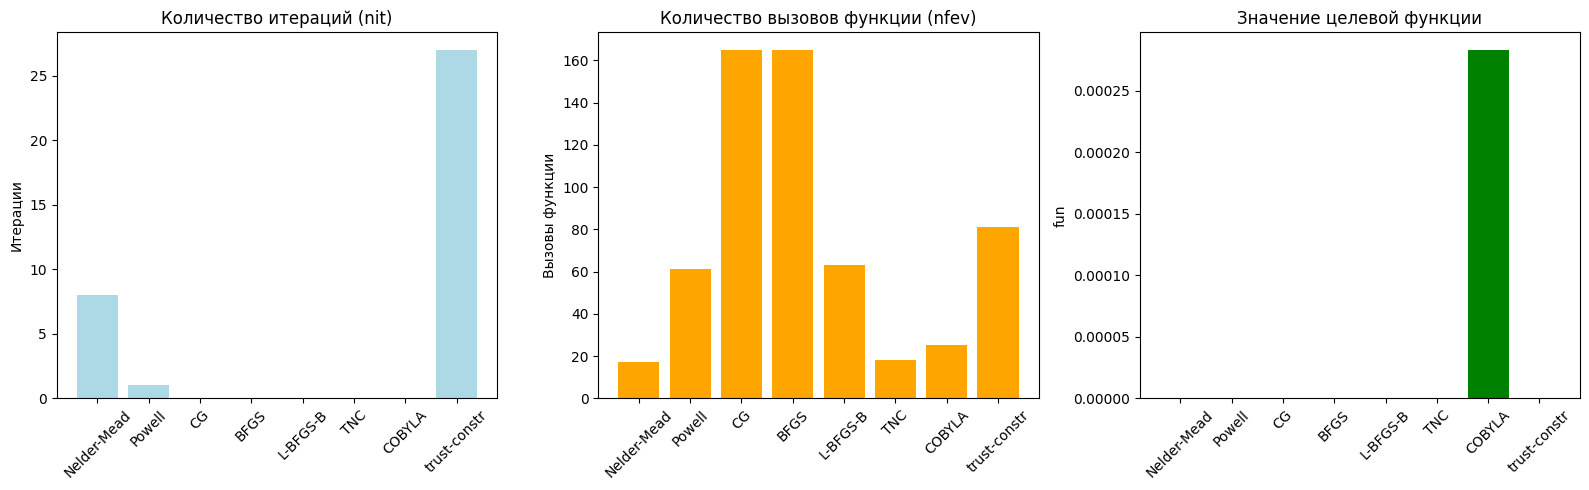

In [2]:
### Дополнительное задание
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Функция Ackley
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

# Начальное приближение
x0 = [0, 0]

# Список методов для экспериментов
methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'L-BFGS-B', 'TNC', 'COBYLA', 'trust-constr']

# Словари для хранения результатов
results_nit = {}
results_nfev = {}
results_fun = {}

# Прогон по методам
for method in methods:
    try:
        result = minimize(ackley, x0, method=method)
        results_nit[method] = result.nit if 'nit' in result else None
        results_nfev[method] = result.nfev
        results_fun[method] = result.fun
    except Exception as e:
        print(f"Method {method} failed: {e}")
        results_nit[method] = None
        results_nfev[method] = None
        results_fun[method] = None

# Визуализация
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.bar(results_nit.keys(), [v if v is not None else 0 for v in results_nit.values()], color='lightblue')
plt.title('Количество итераций (nit)')
plt.ylabel('Итерации')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
plt.bar(results_nfev.keys(), [v if v is not None else 0 for v in results_nfev.values()], color='orange')
plt.title('Количество вызовов функции (nfev)')
plt.ylabel('Вызовы функции')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
plt.bar(results_fun.keys(), [v if v is not None else 0 for v in results_fun.values()], color='green')
plt.title('Значение целевой функции')
plt.ylabel('fun')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
